In [1]:
import pandas as pd
from datetime import datetime, timedelta, date
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import itertools
import math
from math import sqrt,exp,e
import scipy
from scipy.stats import weibull_min, lognorm, gamma, kstest, anderson, ksone, probplot, johnsonsb, beta, rayleigh
from scipy.optimize import curve_fit
import sklearn.metrics as metrics
import seaborn as sns
from itertools import count

In [2]:
b44025_wind = pd.read_csv('b44025_wind.txt')
b44025_wind = b44025_wind[(b44025_wind['Year'] > 2016) & (b44025_wind['Year'] < 2019)]
b44025_wind.head()

,Date,WSPD,u10,Year,Month,Day,Hour,Minute
389450,2017-01-01 00:00:00-05:00,13.3,14.417785,2017,1,1,0,0
389451,2017-01-01 00:10:00-05:00,13.2,14.309381,2017,1,1,0,10
389452,2017-01-01 00:20:00-05:00,13.4,14.526190,2017,1,1,0,20
389453,2017-01-01 00:30:00-05:00,13.3,14.417785,2017,1,1,0,30
389454,2017-01-01 00:40:00-05:00,12.8,13.875763,2017,1,1,0,40


In [3]:
b44017_wind = pd.read_csv('b44017_wind.txt')
b44017_wind = b44017_wind[(b44017_wind['Year'] > 2016) & (b44017_wind['Year'] < 2019)]
b44017_wind.head()

,Date,WSPD,u10,Year,Month,Day,Hour,Minute
289112,2017-01-01 00:00:00-05:00,13.7,14.851403,2017,1,1,0,0
289113,2017-01-01 00:10:00-05:00,12.7,13.767359,2017,1,1,0,10
289114,2017-01-01 00:20:00-05:00,12.6,13.658954,2017,1,1,0,20
289115,2017-01-01 00:30:00-05:00,12.9,13.984168,2017,1,1,0,30
289116,2017-01-01 00:40:00-05:00,11.6,12.574910,2017,1,1,0,40


In [4]:
asit = pd.read_csv('asit_lidar.txt')
asit.head()

,Date&Time,53,60,80,90,100,110,120,Hour,Minute
0,2016-12-31 19:00:00-05:00,14.87,15.08,15.57,15.76,15.94,16.12,16.27,19,0
1,2016-12-31 19:10:00-05:00,16.25,16.47,17.14,17.42,17.61,17.76,17.92,19,10
2,2016-12-31 19:20:00-05:00,17.08,17.30,17.84,18.01,18.18,18.37,18.54,19,20
3,2016-12-31 19:30:00-05:00,16.03,16.30,16.89,17.09,17.24,17.37,17.50,19,30
4,2016-12-31 19:40:00-05:00,17.14,17.50,18.33,18.57,18.74,18.89,19.04,19,40


In [5]:
shape1_03, shape2_03, loc_03, scale_03 = beta.fit(b44025_wind['WSPD'],loc=0)
shape_02, loc_02, scale_02 = weibull_min.fit(b44025_wind['WSPD'],loc=0)

ks_error_02 = kstest(b44025_wind['WSPD'], 'weibull_min', args=(shape_02, loc_02, scale_02))
ks_error_03 = kstest(b44025_wind['WSPD'], 'beta', args=(shape1_03, shape2_03, loc_03, scale_03))

ks_error_02, ks_error_03

C:\Users\panmits86\Anaconda3\envs\unidata\lib\site-packages\scipy\stats\_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


(KstestResult(statistic=0.014878957019055505, pvalue=3.70050288248263e-20),
 KstestResult(statistic=0.01169102821346013, pvalue=1.3112814115783559e-12))

In [6]:
shape1_03, shape2_03, loc_03, scale_03

(2.541406080451843,
 6.662152457177346,
 -0.14652868324187024,
 25.272090937830317)

In [7]:
shape_02, loc_02, scale_02

(2.0336999051549407, -0.010909294910224038, 7.726687858323164)

In [8]:
shape1_13, shape2_13, loc_13, scale_13 = beta.fit(b44017_wind['WSPD'],loc=0)
shape_12, loc_12, scale_12 = weibull_min.fit(b44017_wind['WSPD'],loc=0)

ks_error_12 = kstest(b44017_wind['WSPD'], 'weibull_min', args=(shape_12, loc_12, scale_12))
ks_error_13 = kstest(b44017_wind['WSPD'], 'beta', args=(shape1_13, shape2_13, loc_13, scale_13))

ks_error_12, ks_error_13

(KstestResult(statistic=0.015990761621992533, pvalue=8.690777856028776e-12),
 KstestResult(statistic=0.012443529374488449, pvalue=2.6312464365062803e-07))

In [9]:
shape1_13, shape2_13, loc_13, scale_13

(2.2790790243611556,
 6.366808703801542,
 -0.004657518068619105,
 25.668893536965918)

In [10]:
shape_12, loc_12, scale_12

(1.9159733381108779, 0.07046691476665407, 7.544668276432141)

In [11]:
shape1_23, shape2_23, loc_23, scale_23 = beta.fit(asit['120'],loc=0)
shape_22, loc_22, scale_22 = weibull_min.fit(asit['120'],loc=0)

ks_error_22 = kstest(asit['120'], 'weibull_min', args=(shape_22, loc_22, scale_22))
ks_error_23 = kstest(asit['120'], 'beta', args=(shape1_23, shape2_23, loc_23, scale_23))

ks_error_22, ks_error_23

(KstestResult(statistic=0.008971169978680194, pvalue=1.679556880452098e-07),
 KstestResult(statistic=0.006517800509212079, pvalue=0.0003678089628769712))

In [12]:
shape1_23, shape2_23, loc_23, scale_23

(2.87347628211059, 8.37436699929436, -0.1475272390938462, 39.03672193379437)

In [13]:
shape_22, loc_22, scale_22

(2.0789805137003565, 0.2120016320307975, 10.855788820854631)

In [14]:
shape1_33, shape2_33, loc_33, scale_33 = beta.fit(asit['100'],loc=0)
shape_32, loc_32, scale_32 = weibull_min.fit(asit['100'],loc=0)

ks_error_32 = kstest(asit['100'], 'weibull_min', args=(shape_32, loc_32, scale_32))
ks_error_33 = kstest(asit['100'], 'beta', args=(shape1_33, shape2_33, loc_33, scale_33))

ks_error_32, ks_error_33

(KstestResult(statistic=0.008060214140859223, pvalue=3.881651260435528e-06),
 KstestResult(statistic=0.0046820075892118895, pvalue=0.023611936315567506))

In [15]:
shape1_33, shape2_33, loc_33, scale_33

(3.0745360959815753, 8.860111064103227, -0.2867493531744593, 37.99941556842214)

In [16]:
shape_32, loc_32, scale_32

(2.130242277256788, 0.1698191211401714, 10.540495886591486)

In [17]:
x01 = np.linspace(b44025_wind['u10'].min(), b44025_wind['u10'].max(), 100)
x11 = np.linspace(b44017_wind['u10'].min(), b44017_wind['u10'].max(), 100)

In [27]:
"""
fit the data to 101 distributions, evaluate based on the k-s test and p-value, 
sort the k-s statistic and determine the pdf which fits best. this is a demonstration,
only the distributions with a K-S error lower than 0.02 are evaluated and shown here 
becaue fitting 101 distributions is time-consuming
"""

list_of_dists = ['genexpon','burr12','exponweib','chi','beta','gengamma','johnsonsb','rice','nakagami','rayleigh','weibull_min']

results = []
for i in list_of_dists:
    dist = getattr(scipy.stats, i)
    param = dist.fit(b44025_wind['WSPD'])
    a = kstest(b44025_wind['WSPD'], i, args=param)
    results.append((i,a[0],a[1]))
    
results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

C:\Users\panmits86\Anaconda3\envs\unidata\lib\site-packages\scipy\stats\_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\panmits86\Anaconda3\envs\unidata\lib\site-packages\scipy\stats\_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


beta: statistic=0.011691384863382392, pvalue=1.3090391562213166e-12
genexpon: statistic=0.013904910777012947, pvalue=1.1671761257911061e-17
gengamma: statistic=0.013949362924409403, pvalue=9.052728184721541e-18
johnsonsb: statistic=0.014039310576690611, pvalue=5.4000512732639285e-18
burr12: statistic=0.014725287220564098, pvalue=9.413070422970396e-20
exponweib: statistic=0.015637591761884895, pvalue=3.1977717909978256e-22
rice: statistic=0.015643297827654612, pvalue=3.082753172180434e-22
chi: statistic=0.01569846116937723, pvalue=2.16193230808483e-22
nakagami: statistic=0.01570018374453297, pvalue=2.1380674893324805e-22
rayleigh: statistic=0.015800333288576662, pvalue=1.1190262013582434e-22
weibull_min: statistic=0.42081364927250686, pvalue=0.0


In [21]:
"""
fit the data to 101 distributions, evaluate based on the k-s test and p-value, 
sort the k-s statistic and determine the pdf which fits best. this is a demonstration,
only the distributions with a K-S error lower than 0.02 are evaluated and shown here 
becaue fitting 101 distributions is time-consuming
"""

list_of_dists = ['genexpon','burr12','exponweib','chi','beta','gengamma','johnsonsb','rice','nakagami','rayleigh','weibull_min']

results = []
for i in list_of_dists:
    dist = getattr(scipy.stats, i)
    param = dist.fit(b44017_wind['WSPD'])
    a = kstest(b44017_wind['WSPD'], i, args=param)
    results.append((i,a[0],a[1]))
    
results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

C:\Users\panmits86\Anaconda3\envs\unidata\lib\site-packages\scipy\stats\_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


beta: statistic=0.012443382143461967, pvalue=2.6322329119815174e-07
chi: statistic=0.014397528910244373, pvalue=1.230387546287327e-09
nakagami: statistic=0.014684047635848851, pvalue=5.246304728755951e-10
johnsonsb: statistic=0.015177025464124805, pvalue=1.1637068066116104e-10
exponweib: statistic=0.015299311171165175, pvalue=7.948230204990146e-11
gengamma: statistic=0.015384325000573962, pvalue=6.08667265128773e-11
weibull_min: statistic=0.01599851841272193, pvalue=8.472950641657832e-12
burr12: statistic=0.016491563803380127, pvalue=1.6456857203254509e-12
genexpon: statistic=0.016782014981886362, pvalue=6.123273273641711e-13
rayleigh: statistic=0.024603937100821704, pvalue=2.5379934614493394e-27
rice: statistic=0.024603946879688532, pvalue=2.5378685199115576e-27


In [23]:
"""
fit the data to 101 distributions, evaluate based on the k-s test and p-value, 
sort the k-s statistic and determine the pdf which fits best
"""

list_of_dists = ['genexpon','burr12','exponweib','chi','beta','gengamma','johnsonsb','rice','nakagami','rayleigh','weibull_min']

#list_of_dists = ['exponnorm', 'exponweib', 'invgauss', 'johnsonsu', 'lognorm', 'johnsonsb', 'powerlognorm']
results = []
for i in list_of_dists:
    dist = getattr(scipy.stats, i)
    param = dist.fit(asit['120'])
    a = kstest(asit['120'], i, args=param)
    results.append((i,a[0],a[1]))
    
results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

beta: statistic=0.006517819088896537, pvalue=0.0003677909315524405
gengamma: statistic=0.0073361738084625205, pvalue=3.706413450039033e-05
chi: statistic=0.007422731419927775, pvalue=2.8618970952864913e-05
nakagami: statistic=0.0074229619576551276, pvalue=2.859915198200751e-05
exponweib: statistic=0.0074593508648018725, pvalue=2.5629934529710525e-05
johnsonsb: statistic=0.008006463665573837, pvalue=4.623071113276639e-06
burr12: statistic=0.008720521137308368, pvalue=4.120937915289554e-07
weibull_min: statistic=0.008971646846513082, pvalue=1.6766506460770784e-07
rice: statistic=0.009605629402616958, pvalue=1.5457691257381164e-08
genexpon: statistic=0.18101642339687207, pvalue=0.0
rayleigh: statistic=0.8111427462609824, pvalue=0.0


C:\Users\PANMIT~1\AppData\Local\Temp/ipykernel_17396/1480192074.py:2: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


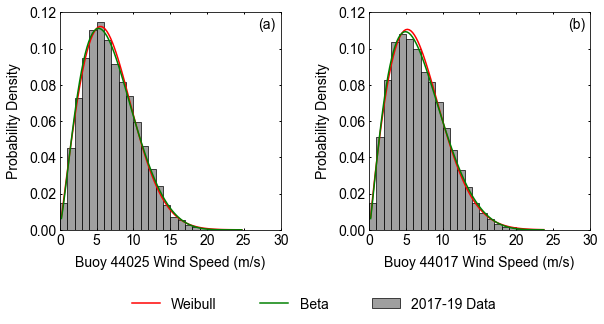

In [29]:
fig, ax_lst = plt.subplots(1, 2,figsize=(9.5, 4.), gridspec_kw={'hspace': 0.25, 'wspace': 0.4})
fig.tight_layout()

def label_subplots(ax_lst, *, upper_case=False,
                   offset_points=(-5, -5)):
    start_ord = 65 if upper_case else 97
    for ax, lab in zip(np.ravel(ax_lst), ('('+chr(j)+')' for j in count(start_ord))):
        ax.annotate(lab, (1., 1),
                    xytext=offset_points,
                    xycoords='axes fraction',
                    textcoords='offset points',
                    ha='right', va='top', fontsize=14, fontweight='regular')


label_subplots(ax_lst, upper_case=False)

mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 14

bins=range(0, 30, 1)

# figure 1

#ax_lst[1,1].hist(b44025_wind['u10'], bins, density=True, color='grey', alpha=0.5, label='Data')
sns.histplot(data=b44025_wind['WSPD'],stat='density',bins=bins,color='grey', label='2017-19 Data',ax=ax_lst[0])


ax_lst[0].plot(x01, weibull_min(shape_02, loc_02, scale_02).pdf(x01), color='red', linewidth=1.5, label="Weibull")
ax_lst[0].plot(x01, beta(shape1_03, shape2_03, loc_03, scale_03).pdf(x01), color='green', linewidth=1.5, label="Beta")

#ax_lst[0].legend(fontsize=9)
#ax_lst[0].grid(linestyle='--',linewidth='0.5')

ax_lst[0].set_xlabel('Buoy 44025 Wind Speed (m/s)',labelpad=8)
ax_lst[0].set_ylabel('Probability Density',labelpad=8)


ax_lst[0].set_ylim(0, 0.12)
ax_lst[0].set_xlim(0, 30)
ax_lst[0].set_xticks(np.arange(0, 31, step=5))

ax_lst[0].xaxis.set_tick_params(which='major', size=2, width=1, direction='in', top='on')
ax_lst[0].yaxis.set_tick_params(which='major', size=2, width=1, direction='in', right='on')


# figure 2

#ax_lst[1,0].hist(b44017_wind['u10'], bins, density=True, color='grey', alpha=0.5, label='Data')
sns.histplot(data=b44017_wind['WSPD'],stat='density',bins=bins,color='grey', label='2017-19 Data',ax=ax_lst[1])

ax_lst[1].plot(x11, weibull_min(shape_12, loc_12, scale_12).pdf(x11), color='red', linewidth=1.5, label="Weibull")
ax_lst[1].plot(x11, beta(shape1_13, shape2_13, loc_13, scale_13).pdf(x11), color='green', linewidth=1.5, label="Beta")

#ax_lst[1].legend(fontsize=9)
#ax_lst[1].grid(linestyle='--',linewidth='0.5')

ax_lst[1].set_xlabel('Buoy 44017 Wind Speed (m/s)',labelpad=8)
ax_lst[1].set_ylabel('Probability Density',labelpad=8)


ax_lst[1].set_ylim(0, 0.12)
ax_lst[1].set_xlim(0, 30)
ax_lst[1].set_xticks(np.arange(0, 31, step=5))

ax_lst[1].xaxis.set_tick_params(which='major', size=2, width=1, direction='in', top='on')
ax_lst[1].yaxis.set_tick_params(which='major', size=2, width=1, direction='in', right='on')


def flip(items, ncol):
    return itertools.chain(*[items[i::ncol] for i in range(ncol)])

handles, labels = ax_lst[0].get_legend_handles_labels()
#ax_lst[1,0].legend(flip(handles, 3), flip(labels, 3), loc='best', ncol=3)
ax_lst[0].legend(flip(handles, 1), flip(labels, 1),bbox_to_anchor=(0.3, -0.4, 1.7, 2), loc='lower left',
           ncol=4, mode="expand", borderaxespad=0.,frameon=False)


plt.savefig('enve5320_buoy_wind_pdfs_loc.png', dpi=300,bbox_inches='tight')

C:\Users\PANMIT~1\AppData\Local\Temp/ipykernel_17396/2470288329.py:2: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Text(0.5, 1.0, 'Weibull')

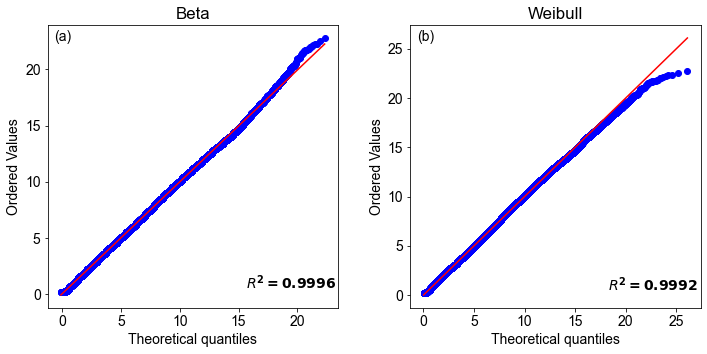

In [28]:
fig, ax_lst = plt.subplots(1, 2,figsize=(11.7, 5.2), gridspec_kw={'hspace': 0.25, 'wspace': 0.25})
fig.tight_layout()

def label_subplots(ax_lst, *, upper_case=False,
                   offset_points=(-5, -5)):
    start_ord = 65 if upper_case else 97
    for ax, lab in zip(np.ravel(ax_lst), ('('+chr(j)+')' for j in count(start_ord))):
        ax.annotate(lab, (0.1, 1),
                    xytext=offset_points,
                    xycoords='axes fraction',
                    textcoords='offset points',
                    ha='right', va='top', fontsize=14, fontweight='regular')


label_subplots(ax_lst, upper_case=False)

mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 14


# Figure 1

probplot(b44025_wind['WSPD'], dist=beta, sparams=(shape1_03, shape2_03,loc_03,scale_03), plot=ax_lst[0],rvalue=True)
ax_lst[0].set_title('Beta')


# Figure 2

probplot(b44025_wind['WSPD'], dist=weibull_min, sparams=(shape_02, loc_02, scale_02), plot=ax_lst[1],rvalue=True)
ax_lst[1].set_title('Weibull')


#plt.savefig('enve5320_buoy_wind_probplot.png', dpi=600,bbox_inches='tight')

C:\Users\PANMIT~1\AppData\Local\Temp/ipykernel_14488/819518945.py:2: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


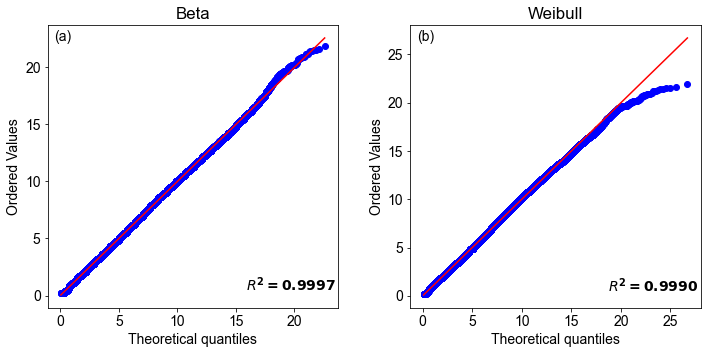

In [80]:
fig, ax_lst = plt.subplots(1, 2,figsize=(11.7, 5.2), gridspec_kw={'hspace': 0.25, 'wspace': 0.25})
fig.tight_layout()

def label_subplots(ax_lst, *, upper_case=False,
                   offset_points=(-5, -5)):
    start_ord = 65 if upper_case else 97
    for ax, lab in zip(np.ravel(ax_lst), ('('+chr(j)+')' for j in count(start_ord))):
        ax.annotate(lab, (0.1, 1),
                    xytext=offset_points,
                    xycoords='axes fraction',
                    textcoords='offset points',
                    ha='right', va='top', fontsize=14, fontweight='regular')


label_subplots(ax_lst, upper_case=False)

mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 14


# Figure 1

probplot(b44017_wind['WSPD'], dist=beta, sparams=(shape1_13, shape2_13,loc_13,scale_13), plot=ax_lst[0],rvalue=True)
ax_lst[0].set_title('Beta')


# Figure 2

probplot(b44017_wind['WSPD'], dist=weibull_min, sparams=(shape_12, loc_12, scale_12), plot=ax_lst[1],rvalue=True)
ax_lst[1].set_title('Weibull')


#plt.savefig('enve5320_buoy_wind_probplot2.png', dpi=600,bbox_inches='tight')

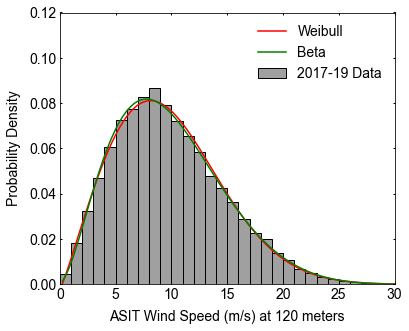

In [32]:
fig, ax = plt.subplots(figsize=(6,5)) 

mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 14

x21 = np.linspace(asit['120'].min(), asit['120'].max(), 100)
bins=range(0, 30, 1)

sns.histplot(data=asit['120'],stat='density',bins=bins,color='grey', label='2017-19 Data',ax=ax)

ax.plot(x21, weibull_min(shape_22, loc_22, scale_22).pdf(x21), color='red', linewidth=1.5, label="Weibull")
ax.plot(x21, beta(shape1_23, shape2_23, loc_23, scale_23).pdf(x21), color='green', linewidth=1.5, label="Beta")

ax.set_xlabel('ASIT Wind Speed (m/s) at 120 meters', labelpad=8)
ax.set_ylabel('Probability Density',labelpad=8)
ax.legend(frameon=False)

ax.set_ylim(0, 0.12)
ax.set_xlim(0, 30)
ax.set_xticks(np.arange(0, 31, step=5))

ax.xaxis.set_tick_params(which='major', size=2, width=1, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=2, width=1, direction='in', right='on')

#plt.savefig('enve5320_asit_wind_pdfs_loc.png', dpi=600, bbox_inches='tight')

C:\Users\PANMIT~1\AppData\Local\Temp/ipykernel_17396/4144836953.py:2: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Text(0.5, 1.0, 'Weibull')

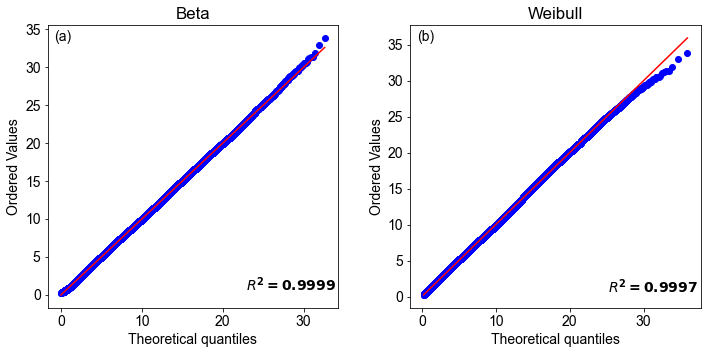

In [34]:
fig, ax_lst = plt.subplots(1, 2,figsize=(11.7, 5.2), gridspec_kw={'hspace': 0.25, 'wspace': 0.25})
fig.tight_layout()

def label_subplots(ax_lst, *, upper_case=False,
                   offset_points=(-5, -5)):
    start_ord = 65 if upper_case else 97
    for ax, lab in zip(np.ravel(ax_lst), ('('+chr(j)+')' for j in count(start_ord))):
        ax.annotate(lab, (0.1, 1),
                    xytext=offset_points,
                    xycoords='axes fraction',
                    textcoords='offset points',
                    ha='right', va='top', fontsize=14, fontweight='regular')


label_subplots(ax_lst, upper_case=False)

mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 14


# Figure 1

probplot(asit['120'], dist=beta, sparams=(shape1_23, shape2_23, loc_23, scale_23), plot=ax_lst[0],rvalue=True)
ax_lst[0].set_title('Beta')


# Figure 2

probplot(asit['120'], dist=weibull_min, sparams=(shape_22, loc_22, scale_22), plot=ax_lst[1],rvalue=True)
ax_lst[1].set_title('Weibull')


#plt.savefig('enve5320_asit_wind_probplot.png', dpi=300,bbox_inches='tight')

In [26]:
asit = asit[asit['53']>20]
asit.head()

,Date&Time,53,60,80,90,100,110,120,Hour,Minute
1487,2017-01-11 05:10:00-05:00,21.54,22.04,23.40,24.00,24.53,24.99,25.45,5,10
3294,2017-01-23 19:40:00-05:00,21.01,21.34,22.14,22.47,22.80,23.10,23.39,19,40
3295,2017-01-23 19:50:00-05:00,20.53,20.87,21.53,21.77,22.00,22.23,22.48,19,50
3296,2017-01-23 20:00:00-05:00,20.04,20.30,21.03,21.32,21.61,21.92,22.23,20,0
3297,2017-01-23 20:10:00-05:00,20.82,21.10,21.68,22.00,22.29,22.57,22.79,20,10
...,...,...,...,...,...,...,...,...,...,...
97102,2018-11-27 07:20:00-05:00,20.49,20.77,21.37,21.50,21.66,21.84,22.01,7,20
97104,2018-11-27 07:40:00-05:00,20.16,20.46,21.21,21.55,21.83,22.07,22.30,7,40
97123,2018-11-27 10:50:00-05:00,20.14,20.37,20.81,20.88,20.96,21.07,21.14,10,50
100516,2018-12-21 17:30:00-05:00,20.31,21.07,23.04,23.91,24.74,25.55,26.29,17,30


In [27]:
uz = asit['120']
uzref = asit['110']
z = 120
zref = 110

# Define the function you need to fit to the data
def func(uzref, a):
    return uzref*((z/zref)**a)

# Fit to determine the parameters a, b, c of the function func:
popt1, pcov = curve_fit(func, uzref, uz)
popt1

array([0.14375638])

In [28]:
# evaluate with R squared

residuals = uz - func(uzref, *popt1)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((uz-np.mean(uz))**2)
r_squared = 1 - (ss_res / ss_tot)
r_squared

0.9955757947266393

In [29]:
uz = asit['110']
uzref = asit['100']
z = 110
zref = 100

# Define the function you need to fit to the data
def func(uzref, a):
    return uzref*((z/zref)**a)

# Fit to determine the parameters a, b, c of the function func:
popt2, pcov = curve_fit(func, uzref, uz)
popt2

array([0.13284363])

In [30]:
# evaluate with R squared

residuals = uz - func(uzref, *popt2)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((uz-np.mean(uz))**2)
r_squared = 1 - (ss_res / ss_tot)
r_squared

0.9950899694234124

In [31]:
uz = asit['100']
uzref = asit['90']
z = 100
zref = 90

# Define the function you need to fit to the data
def func(uzref, a):
    return uzref*((z/zref)**a)

# Fit to determine the parameters a, b, c of the function func:
popt3, pcov = curve_fit(func, uzref, uz)
popt3

array([0.12218948])

In [32]:
# evaluate with R squared

residuals = uz - func(uzref, *popt3)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((uz-np.mean(uz))**2)
r_squared = 1 - (ss_res / ss_tot)
r_squared

0.9943623181562532

In [33]:
uz = asit['90']
uzref = asit['80']
z = 90
zref = 80

# Define the function you need to fit to the data
def func(uzref, a):
    return uzref*((z/zref)**a)

# Fit to determine the parameters a, b, c of the function func:
popt4, pcov = curve_fit(func, uzref, uz)
popt4

array([0.11492422])

In [34]:
# evaluate with R squared

residuals = uz - func(uzref, *popt4)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((uz-np.mean(uz))**2)
r_squared = 1 - (ss_res / ss_tot)
r_squared

0.9926094442704432

In [35]:
uz = asit['80']
uzref = asit['60']
z = 80
zref = 60

# Define the function you need to fit to the data
def func(uzref, a):
    return uzref*((z/zref)**a)

# Fit to determine the parameters a, b, c of the function func:
popt5, pcov = curve_fit(func, uzref, uz)
popt5

array([0.11546071])

In [36]:
uz = asit['60']
uzref = asit['53']
z = 60
zref = 53

# Define the function you need to fit to the data
def func(uzref, a):
    return uzref*((z/zref)**a)

# Fit to determine the parameters a, b, c of the function func:
popt6, pcov = curve_fit(func, uzref, uz)
popt6

array([0.11166052])

In [37]:
levels = [60, 80, 90, 100, 110, 120]
extreme_wind_shear = [popt6[0], popt5[0], popt4[0], popt3[0], popt2[0], popt1[0]]
extreme_wind_shear

[0.11166051658296071,
 0.11546071049048695,
 0.11492422390457849,
 0.12218948494763222,
 0.13284363447612635,
 0.1437563776161121]

In [25]:
# rerun 
wind_shear = [popt6[0], popt5[0], popt4[0], popt3[0], popt2[0], popt1[0]]

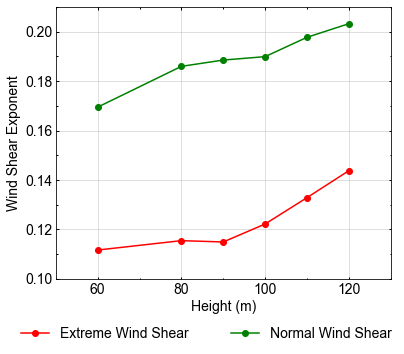

In [42]:
fig, ax = plt.subplots(figsize=(6,5)) 

mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 14

plt.plot(levels, extreme_wind_shear, marker='o', label='Extreme Wind Shear', color='red')
plt.plot(levels, wind_shear, marker='o', label='Normal Wind Shear', color='green')
plt.xlim(50,130)
plt.ylim(0.1,0.21)
plt.xlabel('Height (m)')
plt.ylabel('Wind Shear Exponent')
plt.grid(linestyle='-', alpha=0.5)
#plt.legend()

ax.xaxis.set_tick_params(which='major', size=2.5, width=1, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=2.5, width=1, direction='in', right='on')

ax.xaxis.set_minor_locator(MultipleLocator(10.))
ax.xaxis.set_tick_params(which='minor', size=1.5, width=1., direction='in', top='on',pad=7)

ax.yaxis.set_minor_locator(MultipleLocator(0.01))
ax.yaxis.set_tick_params(which='minor', size=1.5, width=1., direction='in', top='on',pad=7)

def flip(items, ncol):
    return itertools.chain(*[items[i::ncol] for i in range(ncol)])

handles, labels = ax.get_legend_handles_labels()
#ax_lst[1,0].legend(flip(handles, 3), flip(labels, 3), loc='best', ncol=3)
ax.legend(flip(handles, 1), flip(labels, 1),bbox_to_anchor=(-0.12, -0.25, 1.14, 2), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.,frameon=False)

plt.savefig('enve5320_wind_shear_coef.pdf', dpi=300,bbox_inches='tight')